In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import preprocessor as p
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from  nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [72]:
import requests

base_url = "https://newsapi.org/v2/everything"
api_key = "e42e1415bc8e4c4e9dea2415073ee37d" 

stock_symbol = "AMZN"  # You can use any stock name or symbol here
pages = 5
page_size = 3  # To get 3 news articles per page

news_articles = []

for i in range(1, pages + 1):
    print(f"Fetching news from page {i}")
    url = f"{base_url}?q={stock_symbol}&page={i}&pageSize={page_size}&apiKey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        for article in data.get('articles', []):
            news_articles.append(article['title']) 
        print(f"   ---> {len(news_articles)} total articles fetched.")
    else:
        print(f"Failed to fetch data for page {i}, Status code: {response.status_code}")
print(f"Total articles collected: {len(news_articles)}")
print(news_articles)

df = pd.DataFrame(news_articles)


Fetching news from page 1
   ---> 3 total articles fetched.
Fetching news from page 2
   ---> 6 total articles fetched.
Fetching news from page 3
   ---> 9 total articles fetched.
Fetching news from page 4
   ---> 12 total articles fetched.
Fetching news from page 5
   ---> 15 total articles fetched.
Total articles collected: 15
['Amazon earnings live updates: Wall Street watching for margins, signs of consumer health', "Amazon's a company investors can 'put money to work in': Analyst", "Amazon reports third-quarter earnings this week. Here's what to expect", 'Amazon is taking on Nvidia with an AI freebie', 'Apple is going after Google and Amazon with a new smart home competitor', 'Amazon is investing another $4 billion in AI startup Anthropic', 'Amazon beats third-quarter earnings expectations on strong cloud growth', "Amazon workers were 'appalled' by claims anyone was 'excited' over the in-office mandate", "Amazon is still figuring out Alexa's AI brain", "Amazon return-to-office man

In [73]:
df.head()

,0
0,Amazon earnings live updates: Wall Street watc...
1,Amazon's a company investors can 'put money to...
2,Amazon reports third-quarter earnings this wee...
3,Amazon is taking on Nvidia with an AI freebie
4,Apple is going after Google and Amazon with a ...


In [74]:
df.rename(columns={0: 'Title'}, inplace=True)

In [75]:
df.head()

,Title
0,Amazon earnings live updates: Wall Street watc...
1,Amazon's a company investors can 'put money to...
2,Amazon reports third-quarter earnings this wee...
3,Amazon is taking on Nvidia with an AI freebie
4,Apple is going after Google and Amazon with a ...


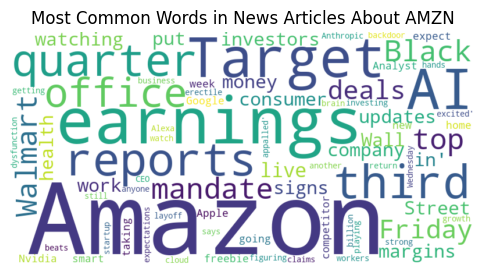

In [76]:
text = " ".join(news_articles)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Most Common Words in News Articles About {stock_symbol}")
plt.show()

wordcloud.to_file('wordcloud_amzn.png')

In [79]:
from textblob import TextBlob

for i in range (0,5):
    sentence = df.iloc[i]['Title']
    
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    print(f"Sentence: {sentence}")
    print(f"Polarity: {polarity}")  # Ranges from -1 (negative) to 1 (positive)
    print(f"Subjectivity: {subjectivity}")  # Ranges from 0 (objective) to 1 (subjective)
    print("\n")

Sentence: Amazon earnings live updates: Wall Street watching for margins, signs of consumer health
Polarity: 0.13636363636363635
Subjectivity: 0.5


Sentence: Amazon's a company investors can 'put money to work in': Analyst
Polarity: 0.0
Subjectivity: 0.0


Sentence: Amazon reports third-quarter earnings this week. Here's what to expect
Polarity: 0.0
Subjectivity: 0.0


Sentence: Amazon is taking on Nvidia with an AI freebie
Polarity: 0.0
Subjectivity: 0.0


Sentence: Apple is going after Google and Amazon with a new smart home competitor
Polarity: 0.17532467532467533
Subjectivity: 0.5487012987012987




In [87]:
for i in range (0,5):
    sentence = df.iloc[i]['Title']
    
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    print(f"Sentence: {sentence}")
    if (polarity > 0):
        print("Postive Sentence")
    elif (polarity == 0):
        print("Neutral Sentence")
    else:
        print("Negetive Sentence")
    print("")

Sentence: Amazon earnings live updates: Wall Street watching for margins, signs of consumer health
Postive Sentence

Sentence: Amazon's a company investors can 'put money to work in': Analyst
Neutral Sentence

Sentence: Amazon reports third-quarter earnings this week. Here's what to expect
Neutral Sentence

Sentence: Amazon is taking on Nvidia with an AI freebie
Neutral Sentence

Sentence: Apple is going after Google and Amazon with a new smart home competitor
Postive Sentence



In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

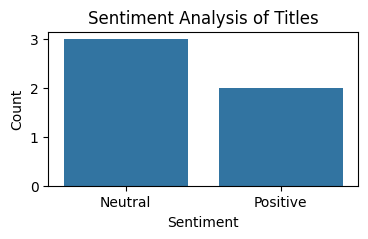

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample DataFrame for the example
data = {'Title': ['Amazon earnings live updates...', 
                  'Amazon is taking on Nvidia with an AI freebie',
                  'Apple is going after Google and Amazon',
                  'Amazon reports third-quarter earnings this week',
                  'Amazon Prime Day: Best Deals for Shoppers']}
df = pd.DataFrame(data)

# Create a list to store sentiment labels
sentiments = []

# Loop through the DataFrame to analyze sentiment for each title
for i in range(0, 5):  # Loop through the first 5 rows
    sentence = df.iloc[i]['Title']
    
    # Sentiment analysis using TextBlob
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    
    # Classify sentiment based on polarity
    if polarity > 0:
        sentiments.append('Positive')
    elif polarity == 0:
        sentiments.append('Neutral')
    else:
        sentiments.append('Negative')

# Add the sentiments to the DataFrame (optional)
df['Sentiment'] = sentiments

# Count the frequency of each sentiment category
sentiment_counts = pd.Series(sentiments).value_counts()

# Plotting the sentiment distribution as a bar chart
plt.figure(figsize=(4, 2))  # Adjust the figure size as needed
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Titles')

# Show the plot
plt.show()




In [104]:
df['Tokenized'] = df['Title'].apply(lambda x: word_tokenize(x))
print(df[['Title', 'Tokenized']])

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [106]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [107]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Sample DataFrame
data = {
    "Title": [
        "Amazon earnings live updates",
        "Apple reports record profits",
        "Microsoft launches new AI product",
        "Tesla's new car hits the market",
        "Google announces cloud gaming service"
    ]
}

df = pd.DataFrame(data)

df['Tokenized'] = df['Title'].apply(lambda x: word_tokenize(x))

print(df[['Title', 'Tokenized']])

                                   Title  \
0           Amazon earnings live updates   
1           Apple reports record profits   
2      Microsoft launches new AI product   
3        Tesla's new car hits the market   
4  Google announces cloud gaming service   

                                     Tokenized  
0            [Amazon, earnings, live, updates]  
1            [Apple, reports, record, profits]  
2      [Microsoft, launches, new, AI, product]  
3     [Tesla, 's, new, car, hits, the, market]  
4  [Google, announces, cloud, gaming, service]  


In [109]:


def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize each word in the text
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Return lemmatized sentence
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function to the 'Title' column
df['lemmatized_title'] = df['Title'].apply(lemmatize_text)

# Display the result
print(df[['Title', 'lemmatized_title']])

                                   Title  \
0           Amazon earnings live updates   
1           Apple reports record profits   
2      Microsoft launches new AI product   
3        Tesla's new car hits the market   
4  Google announces cloud gaming service   

                        lemmatized_title  
0            Amazon earnings live update  
1             Apple report record profit  
2        Microsoft launch new AI product  
3        Tesla 's new car hit the market  
4  Google announces cloud gaming service  
